<a href="https://colab.research.google.com/github/razvanpetru1/Test1/blob/master/Classification_task_assigment_1_Petru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset entry (Load dataset)

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd # Library for data exporation

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X_raw = car_evaluation.data.features
y_raw = car_evaluation.data.targets



In [2]:
print("Available metadata keys:")
print(car_evaluation.metadata.keys())

Available metadata keys:
dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])


In [3]:
# Print database details:
# URL
print("Repository URL:", car_evaluation.metadata['repository_url'])

# Dataset name
print("Dataset Name:", car_evaluation.metadata['name'])
print("No instances:", car_evaluation.metadata['num_instances']) # samples instastances in the dataset
print("No features:", car_evaluation.metadata['num_features']) # features in the dataset

# Description
print("Description:", car_evaluation.metadata['abstract'])
print()

#Access the additional_info dictionary
additional_info = car_evaluation.metadata['additional_info']
print(additional_info)

# Get the 'variable_info' string
variable_info = additional_info['variable_info'] #'variable_info'

# Print the 'variable_info' string with proper formatting
print(variable_info)

Repository URL: https://archive.ics.uci.edu/dataset/19/car+evaluation
Dataset Name: Car Evaluation
No instances: 1728
No features: 6
Description: Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.

{'summary': 'Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:\r\n\r\nCAR                      car acceptability\r\n. PRICE                  overall price\r\n. . buying               buying price\r\n. . maint                price of the maintenance\r\n. TECH                   technical characteristics\r\n. . COMFORT              comfort\r\n. . . doors              number of doors\r\n. . . persons            capacity in terms of persons to carry\r\n. . . lug

In [4]:
# Inputs valiabe (features)
print("Features database:")
display(X_raw.head())

Features database:


,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [5]:
# Outputs valuable (targets)
print("Labels database:")
display(y_raw.head())

Labels database:


,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [6]:
print(X_raw.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


# Dataset Encoding and Preprocessing

**Overview of the data**

In [7]:
print("Missing values in features:\n", X_raw.isnull().sum())
print("\nMissing values in target:\n", y_raw.isnull().sum())

Missing values in features:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

Missing values in target:
 class    0
dtype: int64


In [8]:
for column in X_raw.columns:
    print(f"{column} unique values:", X_raw[column].unique())

print("\nTarget class distribution:")
print(y_raw['class'].value_counts())


buying unique values: ['vhigh' 'high' 'med' 'low']
maint unique values: ['vhigh' 'high' 'med' 'low']
doors unique values: ['2' '3' '4' '5more']
persons unique values: ['2' '4' 'more']
lug_boot unique values: ['small' 'med' 'big']
safety unique values: ['low' 'med' 'high']

Target class distribution:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

categories = [
    ["low", "med", "high", "vhigh"],  # for 'buying'
    ["low", "med", "high", "vhigh"],  # for 'maint'
    ['2','3','4','5more'],            # for 'doors'
    ['2','4','more'],                 # for 'persons'
    ['small', 'med', 'big'],          # for 'lug_boot'
    ['low', 'med', 'high'],           # for 'safety'
]

# Initialize OrdinalEncoder with specified category order
ordinal_encoder = OrdinalEncoder(categories=categories)
encoded_features = ordinal_encoder.fit_transform(X_raw)
X_encoded = pd.DataFrame(encoded_features, columns=X_raw.columns)

# Binary encoding for target variable
y_encoded = y_raw.replace({'unacc': 0, 'acc': 1, 'good': 1, 'vgood': 1})  # acceptable = 1, unacceptable = 0

# Display the encoded features and target
print("Encoded Features:")
display(X_encoded.head())
print("\nEncoded Target (class):")
display(y_encoded.head())


Encoded Features:


<ipython-input-9-43ee0c7bf19e>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_encoded = y_raw.replace({'unacc': 0, 'acc': 1, 'good': 1, 'vgood': 1})  # acceptable = 1, unacceptable = 0


,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0
2,3.0,3.0,0.0,0.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0



Encoded Target (class):


,class
0,0
1,0
2,0
3,0
4,0


# Dataset visualization

**Boxplot**

<Axes: >

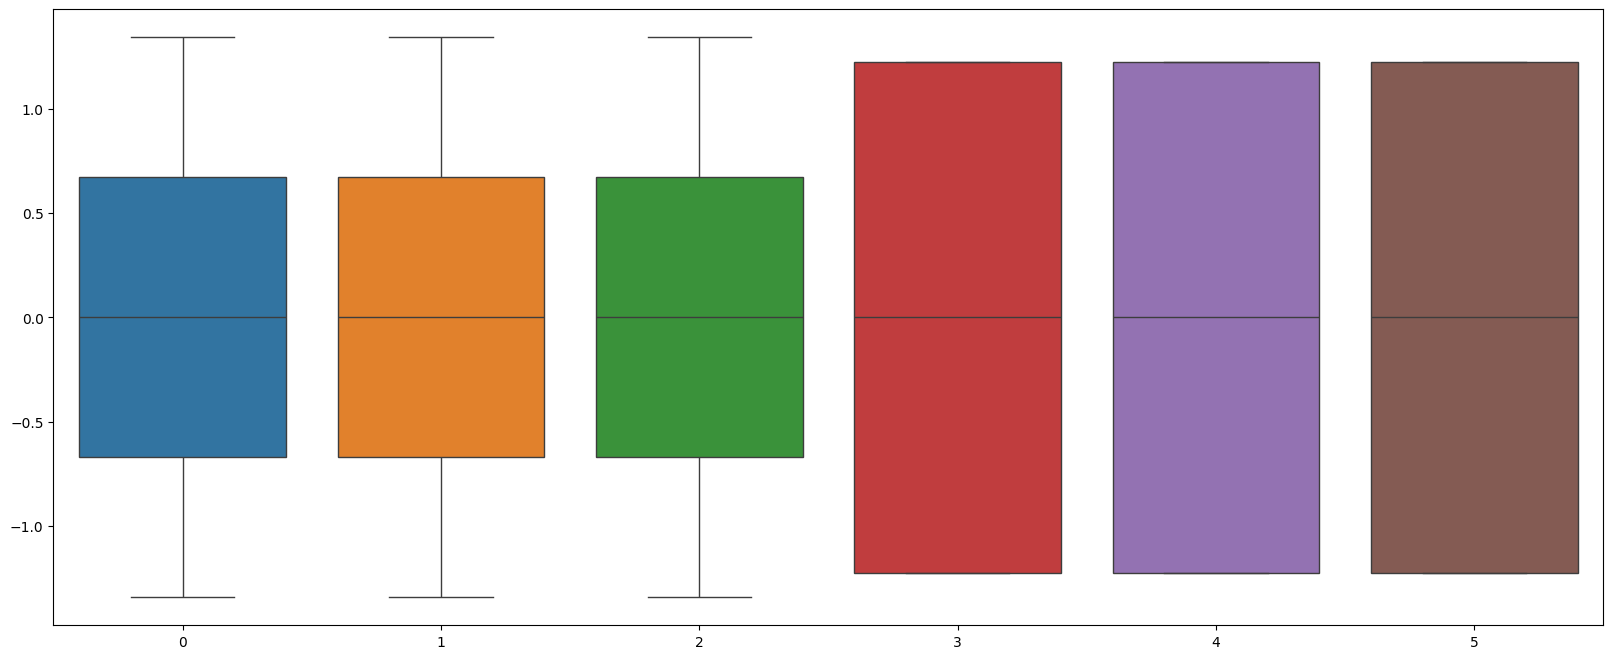

In [10]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
scaler = StandardScaler()
Xs = scaler.fit_transform(X_encoded)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)



Class Distribution:

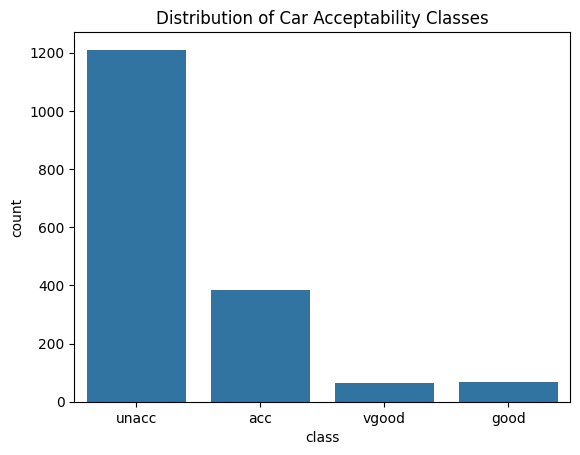

In [11]:


sns.countplot(data=y_raw, x='class')
plt.title("Distribution of Car Acceptability Classes")
plt.show()


Distribution of Feature Variable

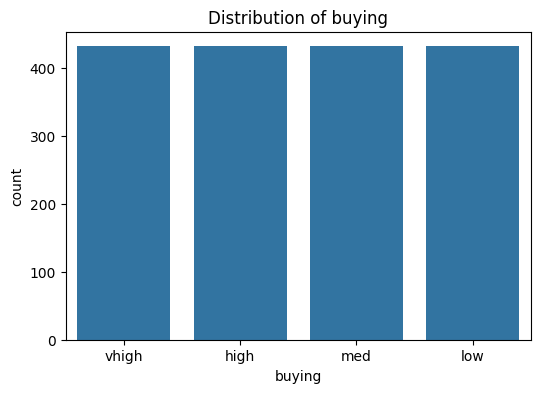

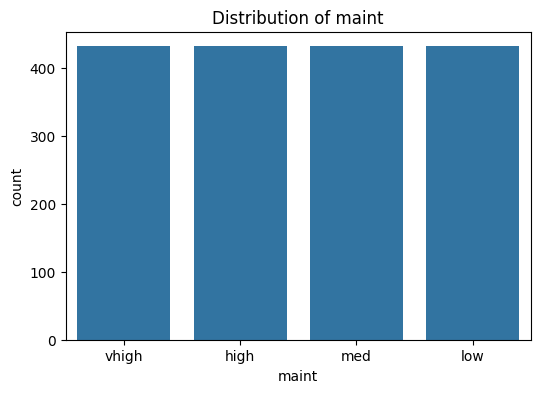

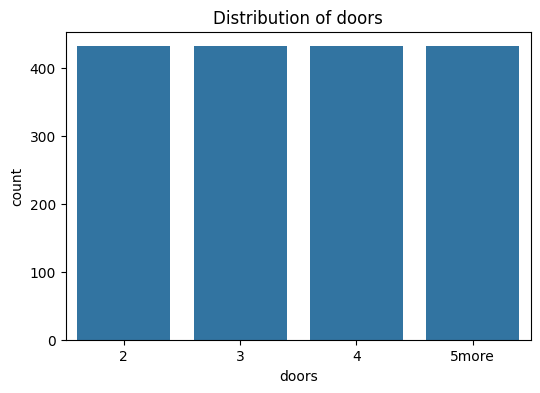

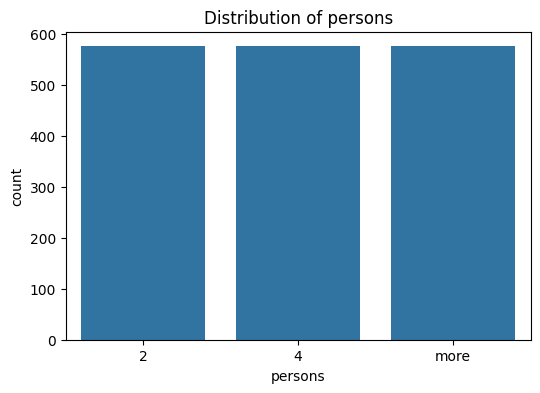

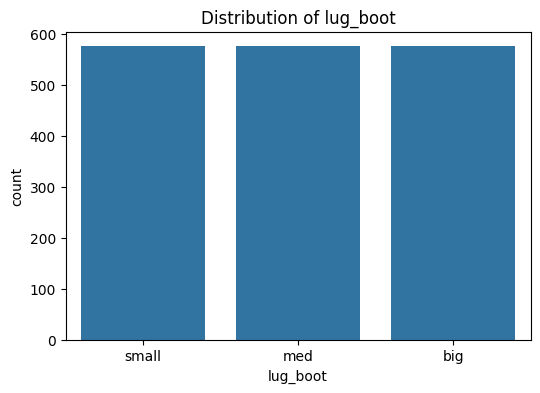

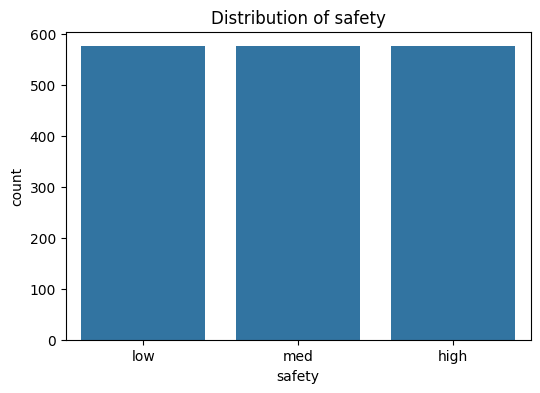

In [12]:
for column in X_raw.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X_raw, x=column)
    plt.title(f"Distribution of {column}")
    plt.show()

**Heatmap**
Since the target variable is categorical, it’s helpful to visualize how each feature’s levels relate to each category of the target variable

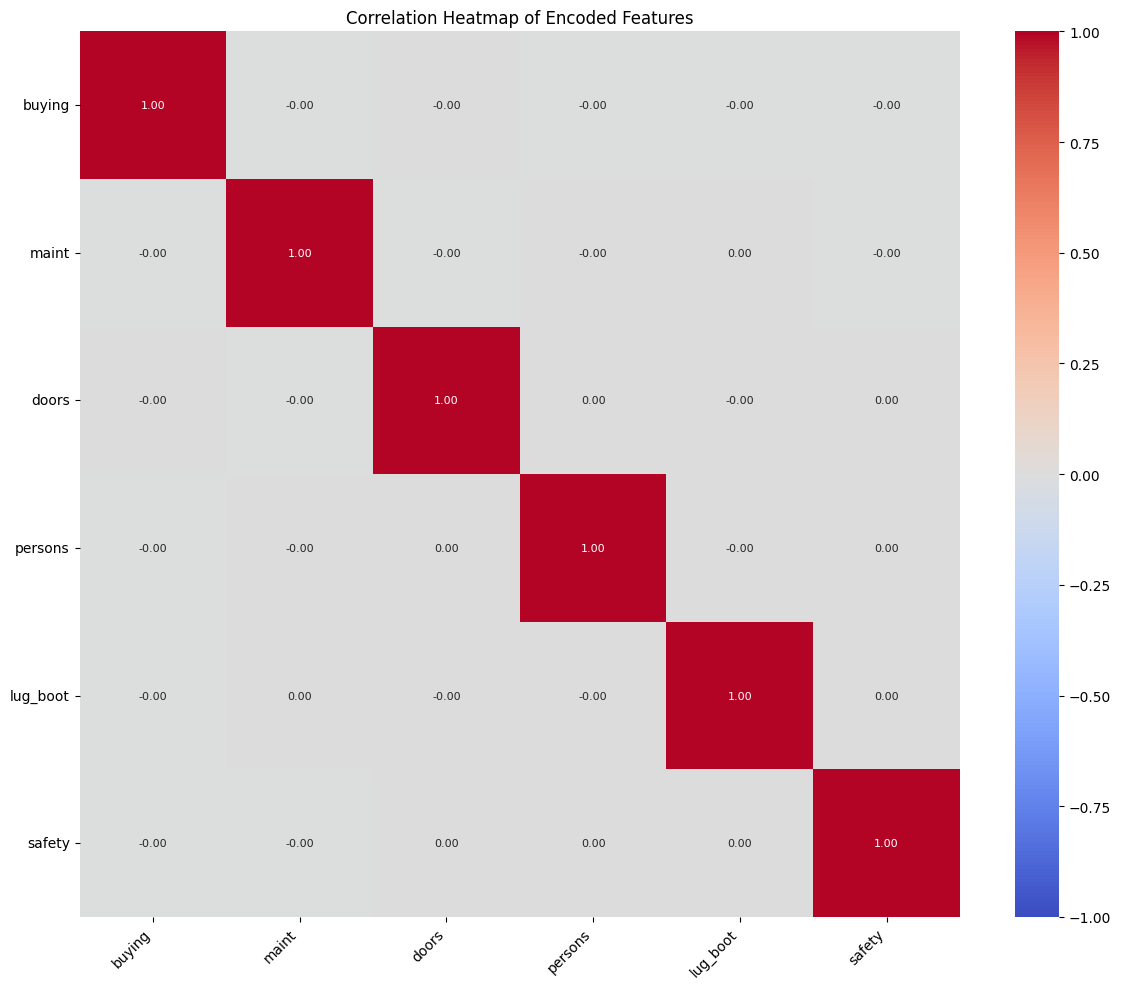

In [13]:
# Compute the correlation matrix
correlation_matrix = X_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    fmt=".2f",  # Limit decimals for clarity
    annot_kws={"size": 8}  # Adjust annotation size for readability
)
plt.title("Correlation Heatmap of Encoded Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

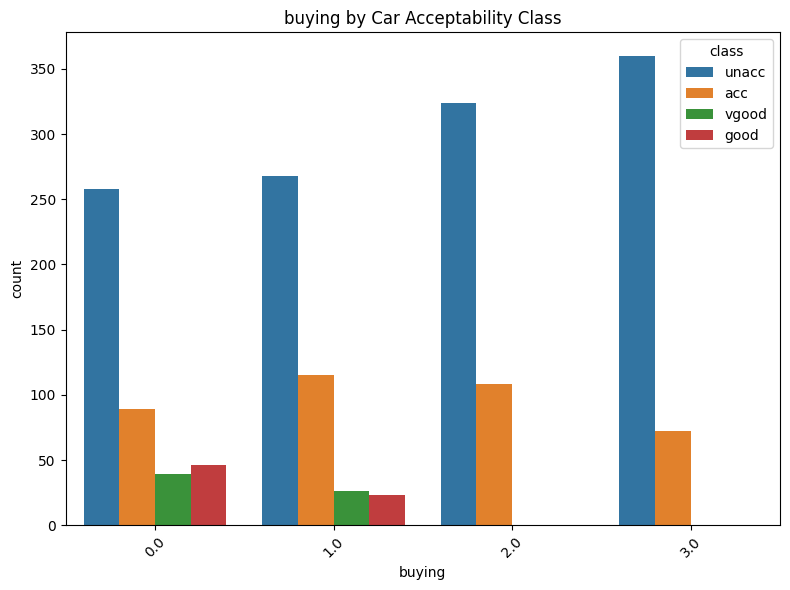

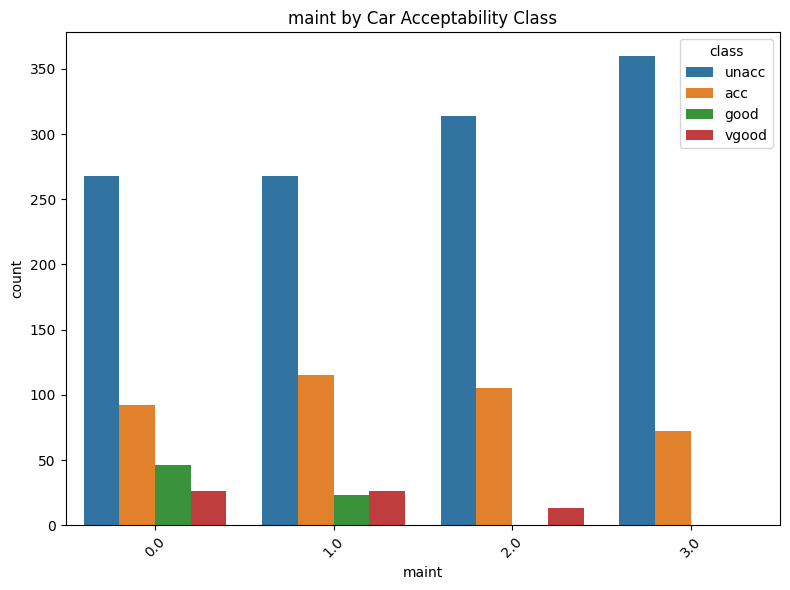

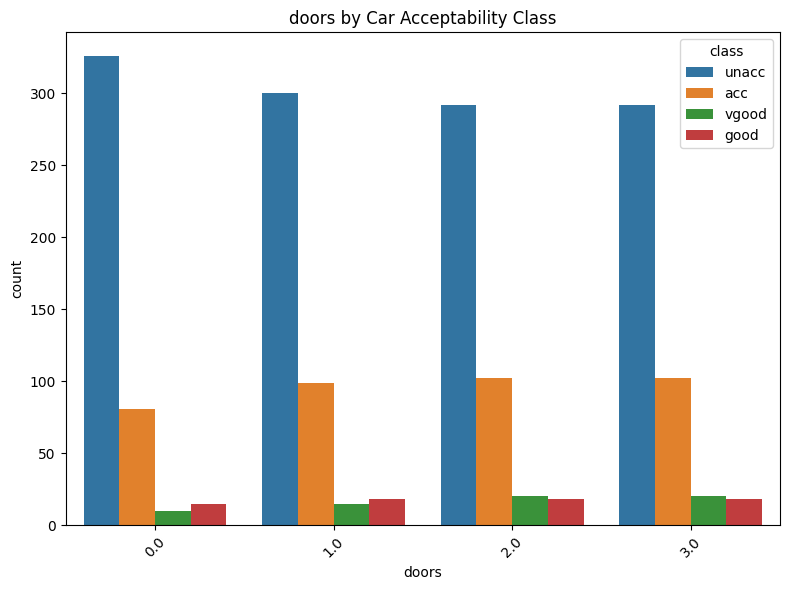

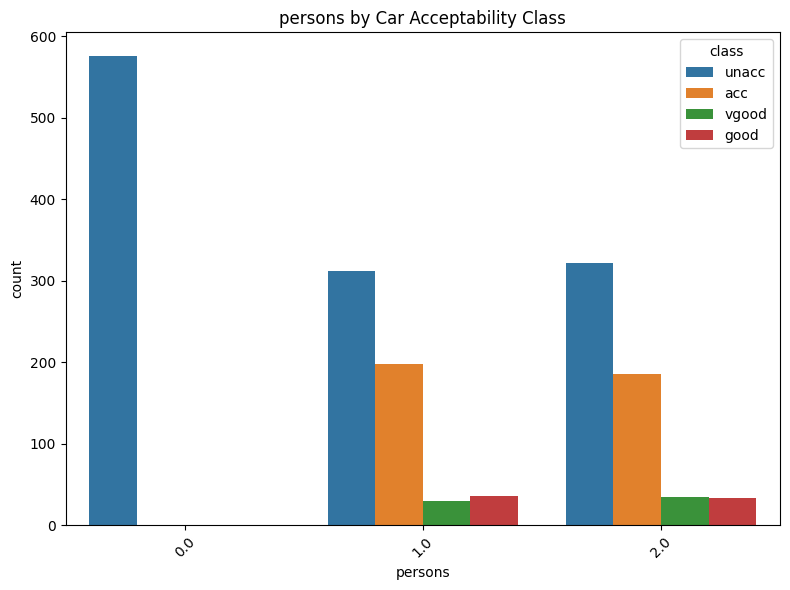

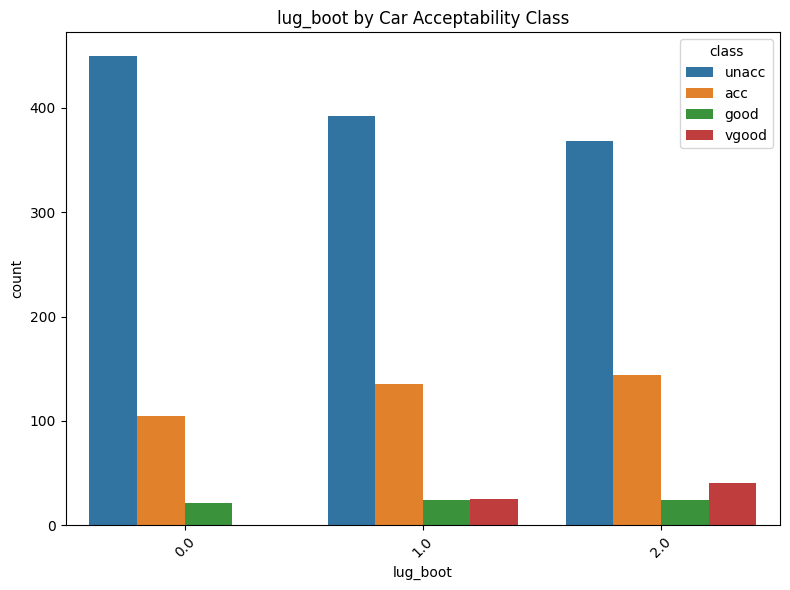

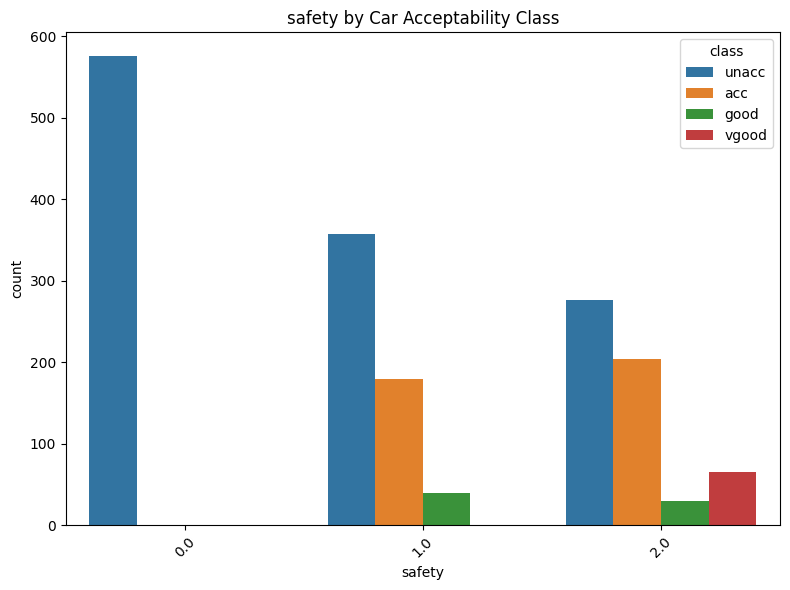

In [14]:
# Plot the relationship of each feature with the target variable
for column in X_encoded.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=pd.concat([X_encoded, y_raw], axis=1), x=column, hue='class')
    plt.title(f"{column} by Car Acceptability Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Summary of the data analysis:

Class Imbalance: Most cars are rated as "unacceptable," so we have fewer examples of other classes. This might impact model accuracy.

Features are mostly independent of each other.

Importnatn features: safety and persons seem important—higher safety ratings.


**Overall, the dataset looks clean.**

# Dataset Splitting

**Split Data into Training, Validation, and Testing Sets**

In [15]:
Xs = X_encoded # features
y = y_encoded # all outputs

Training Set: 70% of the original data (Xs_train and y_train)

Validation Set: 15% of the original data (Xs_val and y_val)

Testing Set: 15% of the original data (Xs_test and y_test)

In [16]:
from sklearn.model_selection import train_test_split
# split the data into training + remaining (validation + testing)
Xs_train, Xs_rem, y_train, y_rem = train_test_split(Xs, y, test_size=0.3, random_state=42)


# split the remaining data into validation and testing sets
Xs_test, Xs_val, y_test, y_val = train_test_split(Xs_rem, y_rem, test_size=0.5, random_state=42) # 0.5 x 0.3 = 0.15


# Display the sizes of each set to confirm
print("Training set size:", Xs_train.shape[0])
print("Validation set size:", Xs_val.shape[0])
print("Testing set size:", Xs_test.shape[0])

Training set size: 1209
Validation set size: 260
Testing set size: 259


# Training: Classification task models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor


Training Set: 70% of the original data (Xs_train and y_train)

Validation Set: 15% of the original data (Xs_val and y_val)

Testing Set: 15% of the original data (Xs_test and y_test)

**A. Logistic Regression**

In [18]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Train the model on the training set
log_reg.fit(Xs_train, y_train.values.ravel())

# Predict on the validation set
y_val_pred = log_reg.predict(Xs_val)

# Evaluate using accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Logistic Regression Validation Accuracy:{ validation_accuracy } - misleading because we have an imbalanced dataset (e.g more unacceptable casrs than acceptable cars).")



Logistic Regression Validation Accuracy:0.85 - misleading because we have an imbalanced dataset (e.g more unacceptable casrs than acceptable cars).


In [19]:
# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred))
print("Interpretation:\n"
      "- Precision: High precision means predictions for each class are mostly correct.\n"
      "- Recall: High recall means the model catches most actual cases for each class.\n"
      "- F1-Score: Balances precision and recall, useful when both are important.\n")

# Print the confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_val, y_val_pred))
print("Interpretation:\n"
      "- Diagonal values: Correct predictions for each class (higher is better).\n"
      "- Off-diagonal values: Misclassifications, where improvements may be needed.\n")


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       180
           1       0.78      0.71      0.75        80

    accuracy                           0.85       260
   macro avg       0.83      0.81      0.82       260
weighted avg       0.85      0.85      0.85       260

Interpretation:
- Precision: High precision means predictions for each class are mostly correct.
- Recall: High recall means the model catches most actual cases for each class.
- F1-Score: Balances precision and recall, useful when both are important.


Confusion Matrix:

[[164  16]
 [ 23  57]]
Interpretation:
- Diagonal values: Correct predictions for each class (higher is better).
- Off-diagonal values: Misclassifications, where improvements may be needed.



**Hyperparameter Tuning for Logistic Regression Optimisation**

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Different regularization strengths
    'penalty': ['l2', 'none'],             # Regularization types (only L2 and no regularization for simplicity)
    'solver': ['lbfgs', 'liblinear', 'saga']  # Solvers compatible with different penalties
}

# Set up GridSearchCV
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_log_reg.fit(Xs_train, y_train.values.ravel())

# Best parameters and cross-validated accuracy
print("Best parameters:", grid_search_log_reg.best_params_)
print("Best cross-validated accuracy:", grid_search_log_reg.best_score_)


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.866012825348925


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

**Evaluate the tuned Logistic Regression model**

In [21]:
# Use the best estimator from the grid search
best_log_reg = grid_search_log_reg.best_estimator_

# Predict on the validation set
y_val_pred = best_log_reg.predict(Xs_val)

# Calculate accuracy and print classification report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

val_accuracy = accuracy_score(y_val, y_val_pred)
print("Tuned Logistic Regression Validation Accuracy:", val_accuracy)
print("\nTuned Logistic Regression Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nTuned Logistic Regression Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Tuned Logistic Regression Validation Accuracy: 0.85

Tuned Logistic Regression Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       180
           1       0.78      0.71      0.75        80

    accuracy                           0.85       260
   macro avg       0.83      0.81      0.82       260
weighted avg       0.85      0.85      0.85       260


Tuned Logistic Regression Validation Confusion Matrix:
 [[164  16]
 [ 23  57]]


Accuracy: 85% on the validation set. \
Class 0 (Unacceptable): High precision (0.88) and recall (0.91), effectively identifying most "unacceptable" cases.\
Class 1 (Acceptable): Moderate precision (0.78) and recall (0.71), indicating it misses some "acceptable" cases.\
Misclassifications: 16 "unacceptable" misclassified as "acceptable" and 23 "acceptable" misclassified as "unacceptable."

**B. Support Vector Machine (SVM) Classifier**


In [22]:
# Initialize SVM with linear kernel
svm_clf = SVC(kernel='linear', random_state=42)

# Train on training data
svm_clf.fit(Xs_train, y_train.values.ravel())

# Predict on validation set
y_val_pred = svm_clf.predict(Xs_val)

# Evaluate accuracy and classification report
val_accuracy = accuracy_score(y_val, y_val_pred)
print("SVM Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nTuned Linear SVM Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


SVM Validation Accuracy: 0.85

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       180
           1       0.78      0.71      0.75        80

    accuracy                           0.85       260
   macro avg       0.83      0.81      0.82       260
weighted avg       0.85      0.85      0.85       260


Tuned Linear SVM Validation Confusion Matrix:
 [[164  16]
 [ 23  57]]


**Hyperparameter Tuning for SCM Classifier**

In [23]:
# Define the parameter grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with SVC (Linear Kernel)
grid_search_svm = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(Xs_train, y_train.values.ravel())

# Best parameters and cross-validated accuracy
print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validated accuracy:", grid_search_svm.best_score_)


Best parameters: {'C': 10}
Best cross-validated accuracy: 0.862700181749597


**Evaluate the tuned model**

In [24]:
# Use the best estimator from the grid search
best_svm_linear = grid_search_svm.best_estimator_

# Predict on the validation set
y_val_pred = best_svm_linear.predict(Xs_val)

# Calculate validation accuracy and print detailed metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Tuned Linear SVM Validation Accuracy:", val_accuracy)
print("\nTuned Linear SVM Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nTuned Linear SVM Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Tuned Linear SVM Validation Accuracy: 0.85

Tuned Linear SVM Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       180
           1       0.78      0.71      0.75        80

    accuracy                           0.85       260
   macro avg       0.83      0.81      0.82       260
weighted avg       0.85      0.85      0.85       260


Tuned Linear SVM Validation Confusion Matrix:
 [[164  16]
 [ 23  57]]


Accuracy: 85% on the validation set. \
Class 0 (Unacceptable): High precision (0.88) and recall (0.91), meaning it accurately captures most "unacceptable" cases. \
Class 1 (Acceptable): Moderate precision (0.78) and recall (0.71), indicating it misses some "acceptable" cases. \
Misclassifications: 16 "unacceptable" misclassified as "acceptable" and 23 "acceptable" misclassified as "unacceptable."

**C. Decision Tree Classifier**

In [25]:
# Initialize the model with a max depth to avoid overfitting
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
tree_clf.fit(Xs_train, y_train.values.ravel())

# Predict on the validation set
y_val_pred = tree_clf.predict(Xs_val)

# Calculate accuracy and print detailed metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Decision Tree Classifier Validation Accuracy:", val_accuracy)
print("\nDecision Tree Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nDecision Tree Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Decision Tree Classifier Validation Accuracy: 0.8769230769230769

Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91       180
           1       0.88      0.70      0.78        80

    accuracy                           0.88       260
   macro avg       0.88      0.83      0.85       260
weighted avg       0.88      0.88      0.87       260


Decision Tree Validation Confusion Matrix:
 [[172   8]
 [ 24  56]]


Accuracy: 87.69% on both validation set \
Class 0 (Unacceptable): High precision (0.88) and recall (0.91)
Class 1 (Acceptable): Strong precision (0.88) and recall (0.71), indicating it misses some cases. \
Misclassified 8 "unacceptable" as "acceptable" and 24 "acceptable" as "unacceptable."

**Hyperparameter Tuning for Decision Tree Classifier**

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with Decision Tree Classifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xs_train, y_train.values.ravel())

# Best parameters and cross-validated score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.9834470697164021


**Evaluate the Tuned Model**

In [27]:
# Use the best estimator from the grid search
best_tree_clf = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_tree_clf.predict(Xs_val)

# Calculate validation accuracy and print detailed metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Tuned Decision Tree Validation Accuracy:", val_accuracy)
print("\nTuned Decision Tree Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nTuned Decision Tree Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Tuned Decision Tree Validation Accuracy: 0.9884615384615385

Tuned Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       180
           1       0.98      0.99      0.98        80

    accuracy                           0.99       260
   macro avg       0.98      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260


Tuned Decision Tree Validation Confusion Matrix:
 [[178   2]
 [  1  79]]


Accuracy: 98.8% on both validation and test sets, indicating strong generalization. \
Class 0 (Unacceptable): Precision and recall both at 0.99, indicating very few errors. \
Class 1 (Acceptable): Strong performance with precision (0.98) and recall (0.99), effectively identifying "acceptable" cases. \
Confusion Matrix: Minimal misclassifications, with only 3 errors in tota.


**D. Multi-Layer Perceptron (MLP) Classifier**

In [28]:
# Initialize the model with basic parameters
mlp_clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42, early_stopping=True) #Use early stopping for automatic control of overfitting and unnecessary iterations.

# Train the model, converting y_train to a NumPy array and using .ravel() to flatten it
mlp_clf.fit(Xs_train, y_train.values.ravel())

# Predict on the validation set
y_val_pred = mlp_clf.predict(Xs_val)

# Calculate accuracy and print detailed metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
print("MLP Classifier Validation Accuracy:", val_accuracy)
print("\nMLP Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nMLP Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

MLP Classifier Validation Accuracy: 0.95

MLP Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       180
           1       0.91      0.93      0.92        80

    accuracy                           0.95       260
   macro avg       0.94      0.94      0.94       260
weighted avg       0.95      0.95      0.95       260


MLP Validation Confusion Matrix:
 [[173   7]
 [  6  74]]


**Hyperparameter Tuning for MLP Classifier**

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Set up GridSearchCV with MLPClassifier
grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42, early_stopping=True), param_grid, cv=5, scoring='accuracy')
grid_search_mlp.fit(Xs_train, y_train.values.ravel())

# Best parameters and cross-validated score
print("Best parameters:", grid_search_mlp.best_params_)
print("Best cross-validated accuracy:", grid_search_mlp.best_score_)


Best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01}
Best cross-validated accuracy: 0.9611055862281814


Evaluate the Tuned MLP Model

In [30]:
# Use the best estimator from the grid search
best_mlp = grid_search_mlp.best_estimator_

# Predict on the validation set
y_val_pred = best_mlp.predict(Xs_val)

# Calculate validation accuracy and detailed metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Tuned MLP Validation Accuracy:", val_accuracy)
print("\nTuned MLP Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nTuned MLP Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Tuned MLP Validation Accuracy: 0.9576923076923077

Tuned MLP Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       180
           1       0.93      0.94      0.93        80

    accuracy                           0.96       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.96      0.96      0.96       260


Tuned MLP Validation Confusion Matrix:
 [[174   6]
 [  5  75]]


**E. Random forest Classifier**

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(Xs_train, y_train.values.ravel())
y_val_pred = rf_clf.predict(Xs_val)

# Evaluate
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Random Forest Validation Accuracy:", val_accuracy)
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))


Random Forest Validation Accuracy: 0.9923076923076923
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       180
           1       0.98      1.00      0.99        80

    accuracy                           0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260

[[178   2]
 [  0  80]]


# Models Evaluation

**Cross-Validation k-fold** \
List of models to evaluate

In [34]:
from sklearn.metrics import f1_score,recall_score,precision_score,make_scorer

from sklearn.model_selection import cross_val_score
import numpy as np


# Define custom scorers for the recommended metrics
recall_scorer = make_scorer(recall_score, pos_label=0)   # Recall for "unacceptable" (Class 0)
precision_scorer = make_scorer(precision_score, pos_label=1)   # Precision for "acceptable" (Class 1)
f1_scorer = make_scorer(f1_score, average='weighted')    # Weighted F1-score

# List of classification models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Support Vector Classifier', SVC(kernel='linear', random_state=42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=1, random_state=42)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42)),
    ('MLP Classifier', MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42, early_stopping=True))
]

# Dictionaries to store cross-validation results for each metric
recall_results = {}
precision_results = {}
f1_results = {}

# Perform 5-fold cross-validation for each model using the custom scorers
for model_name, model in models:
    recall_scores = cross_val_score(model, Xs, y.values.ravel(), cv=5, scoring=recall_scorer)
    precision_scores = cross_val_score(model, Xs, y.values.ravel(), cv=5, scoring=precision_scorer)
    f1_scores = cross_val_score(model, Xs, y.values.ravel(), cv=5, scoring=f1_scorer)

    mean_recall = np.mean(recall_scores)
    mean_precision = np.mean(precision_scores)
    mean_f1 = np.mean(f1_scores)

    recall_results[model_name] = mean_recall
    precision_results[model_name] = mean_precision
    f1_results[model_name] = mean_f1

    print(f"{model_name} - Mean CV Recall (Class 0): {mean_recall:.4f}, Mean CV Precision (Class 1): {mean_precision:.4f}, Mean CV F1-Score: {mean_f1:.4f}")

# Identify the best and worst models based on each metric
best_recall_model = max(recall_results, key=recall_results.get)
best_recall = recall_results[best_recall_model]

best_precision_model = max(precision_results, key=precision_results.get)
best_precision = precision_results[best_precision_model]

best_f1_model = max(f1_results, key=f1_results.get)
best_f1 = f1_results[best_f1_model]

print(f"\nThe best model based on Recall for Class 0 (Unacceptable) is {best_recall_model} with a mean CV recall of {best_recall:.4f}.\n")
print(f"The best model based on Precision for Class 1 (Acceptable) is {best_precision_model} with a mean CV precision of {best_precision:.4f}.\n")
print(f"The best model based on F1-Score is {best_f1_model} with a mean CV F1-score of {best_f1:.4f}.")



Logistic Regression - Mean CV Recall (Class 0): 0.8793, Mean CV Precision (Class 1): 0.7538, Mean CV F1-Score: 0.8268
Support Vector Classifier - Mean CV Recall (Class 0): 0.8752, Mean CV Precision (Class 1): 0.7529, Mean CV F1-Score: 0.8300


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Classifier - Mean CV Recall (Class 0): 0.9545, Mean CV Precision (Class 1): 0.6789, Mean CV F1-Score: 0.7812
Random Forest Classifier - Mean CV Recall (Class 0): 0.9322, Mean CV Precision (Class 1): 0.8399, Mean CV F1-Score: 0.8868
MLP Classifier - Mean CV Recall (Class 0): 0.9529, Mean CV Precision (Class 1): 0.8834, Mean CV F1-Score: 0.9135

The best model based on Recall for Class 0 (Unacceptable) is Decision Tree Classifier with a mean CV recall of 0.9545.

The best model based on Precision for Class 1 (Acceptable) is MLP Classifier with a mean CV precision of 0.8834.

The best model based on F1-Score is MLP Classifier with a mean CV F1-score of 0.9135.


**The best model for Recall [Decision Tree Classifier]:\
 Class 0 (Unacceptable): This model is the best at catching all the "unacceptable" cars, so it rarely misses any that should be marked as unacceptable.**\

**Best Model for Precision [MLP Classifier]:\
 Class 1 (Acceptable): This model is the best at only marking cars as "acceptable" if they really are, so it makes fewer mistakes in approving cars that shouldn’t be.**

**Best Model for F1-Score[MLP Classifier]:\
 This model balances well between catching "unacceptable" cars and approving "acceptable" ones accurately.**

**Final evaluation on the test dataset**

Steps:
 Train on the full training set \
 Predict on the test set Xs_test \
 Evaluate using MSE : y_test and y_test_pred

In [35]:
print("\nFinal Tests:\n")

# Loggistic Regression
y_test_pred = best_log_reg.predict(Xs_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Tuned Logistic Regression Test Accuracy:", test_accuracy)
print("\nTuned Logistic Regression Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTuned Logistic Regression Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


# SVM Classifier
y_test_pred = best_svm_linear.predict(Xs_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Tuned Linear SVM Test Accuracy:", test_accuracy)
print("\nTuned Linear SVM Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTuned Linear SVM Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


# Decision Tree Classification
# If validation performance is good, evaluate on the test set
y_test_pred = best_tree_clf.predict(Xs_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\n\nTuned Decision Tree Test Accuracy:", test_accuracy)
print("\nTuned Decision Tree Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTuned Decision Tree Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


# MLP Classifier
y_test_pred = best_mlp.predict(Xs_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\n\nTuned MLP Test Accuracy:", test_accuracy)
print("\nTuned MLP Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTuned MLP Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# ERandom forest Classifier
y_test_pred = rf_clf.predict(Xs_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Random Forest Test Accuracy:", test_accuracy)
print("\nRandom Forest Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nRandom Forest Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))






Final Tests:

Tuned Logistic Regression Test Accuracy: 0.8648648648648649

Tuned Logistic Regression Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       178
           1       0.81      0.74      0.77        81

    accuracy                           0.86       259
   macro avg       0.85      0.83      0.84       259
weighted avg       0.86      0.86      0.86       259


Tuned Logistic Regression Test Confusion Matrix:
 [[164  14]
 [ 21  60]]
Tuned Linear SVM Test Accuracy: 0.8648648648648649

Tuned Linear SVM Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       178
           1       0.81      0.74      0.77        81

    accuracy                           0.86       259
   macro avg       0.85      0.83      0.84       259
weighted avg       0.86      0.86      0.86       259


Tuned Linear SVM Test Confusion Matrix:
 [

**Best Models:**
Decision Tree and Random Forest perform best, with high accuracy (98.8%) and balanced recall and precision, even for the minority "acceptable" class.

**Worst Models**
Logistic Regression and SVM: Lower accuracy (86.5%) and weaker recall for "acceptable" cases, making them less ideal for imbalanced data.